Predicting Homeownership with Panel Study of Income Dynamics

In [31]:
# Import modules
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [11]:
df_data = pd.read_csv('PSID_Python.csv')
df_data.head(10)

,RELEASENUMBER,familyid,hhsize,age,lifesatis,dwellingunit,ownhome,employmnt,salaryamnt,owncar,numbercars,ownbusiness,healthins,collegeeduc,highlifesatis,age2,logage,worknow,retired
0,2,5620,1,59,2,3,0,5,0.0,1,1,0,1,0,1,59,4.077538,0,0
1,2,8559,1,57,2,1,1,1,0.0,1,3,0,1,0,1,57,4.043051,1,0
2,2,6510,1,43,3,3,0,5,0.0,0,0,0,1,0,0,43,3.761200,0,0
3,2,9172,1,42,3,1,0,1,0.0,1,1,1,0,0,0,42,3.737670,1,0
4,2,7682,4,27,3,2,0,1,0.0,1,1,0,1,0,0,27,3.295837,1,0
5,2,9421,2,27,1,2,0,1,0.0,0,0,0,0,0,1,27,3.295837,1,0
6,2,6393,2,25,2,3,0,6,0.0,1,1,0,1,0,1,25,3.218876,0,0
7,2,4293,5,35,1,3,0,3,0.0,1,1,0,1,0,1,35,3.555348,0,0
8,2,8691,2,34,2,1,0,1,0.0,1,2,0,1,0,1,34,3.526361,1,0
9,2,8276,3,55,1,1,1,1,0.0,1,3,0,1,0,1,55,4.007333,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_data.ownhome, test_size=0.3, random_state=9)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6724 entries, 2393 to 8574
Data columns (total 19 columns):
RELEASENUMBER    6724 non-null int64
familyid         6724 non-null int64
hhsize           6724 non-null int64
age              6724 non-null int64
lifesatis        6724 non-null int64
dwellingunit     6724 non-null int64
ownhome          6724 non-null int64
employmnt        6724 non-null int64
salaryamnt       6724 non-null float64
owncar           6724 non-null int64
numbercars       6724 non-null int64
ownbusiness      6724 non-null int64
healthins        6724 non-null int64
collegeeduc      6724 non-null int64
highlifesatis    6724 non-null int64
age2             6724 non-null int64
logage           6724 non-null float64
worknow          6724 non-null int64
retired          6724 non-null int64
dtypes: float64(2), int64(17)
memory usage: 1.0 MB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 7051 to 178
Data columns (total 19 columns):
RELEASENUMBER    2883 non-null int64
familyid         2883 non-null int64
hhsize           2883 non-null int64
age              2883 non-null int64
lifesatis        2883 non-null int64
dwellingunit     2883 non-null int64
ownhome          2883 non-null int64
employmnt        2883 non-null int64
salaryamnt       2883 non-null float64
owncar           2883 non-null int64
numbercars       2883 non-null int64
ownbusiness      2883 non-null int64
healthins        2883 non-null int64
collegeeduc      2883 non-null int64
highlifesatis    2883 non-null int64
age2             2883 non-null int64
logage           2883 non-null float64
worknow          2883 non-null int64
retired          2883 non-null int64
dtypes: float64(2), int64(17)
memory usage: 450.5 KB


In [15]:
y_train.describe()

count    6724.000000
mean        0.503272
std         0.500026
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ownhome, dtype: float64

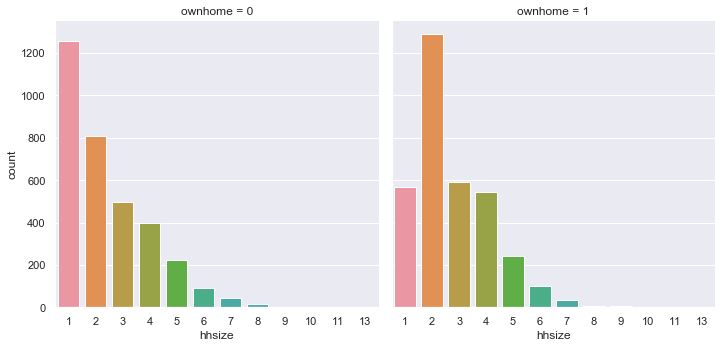

In [16]:
sns.catplot(x='hhsize', col ='ownhome', kind='count', data = X_train)


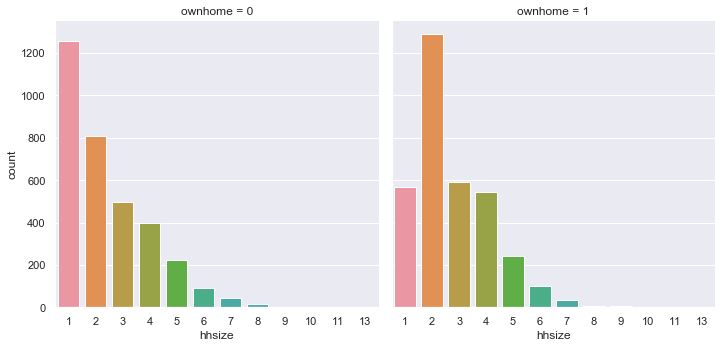

In [17]:
sns.catplot(x='hhsize', col ='ownhome', kind='count', data = X_train)


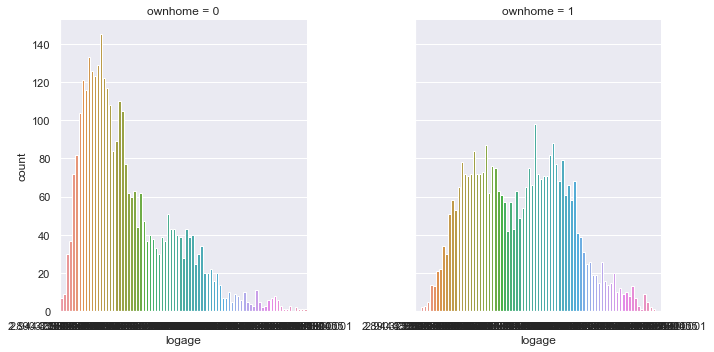

In [21]:
sns.catplot(x='logage', col ='ownhome', kind='count', data = X_train)
#df_data.hist()


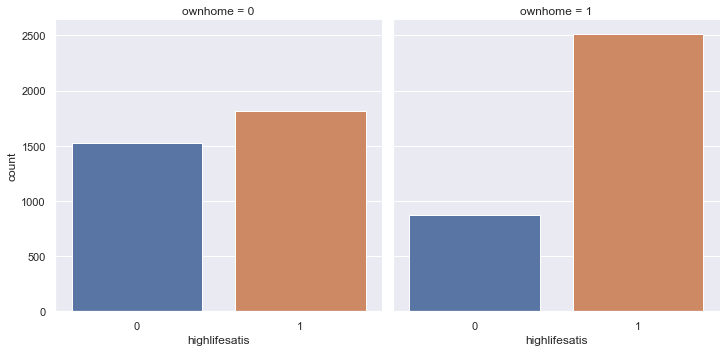

In [22]:
sns.catplot(x='highlifesatis', col ='ownhome', kind='count', data = X_train)


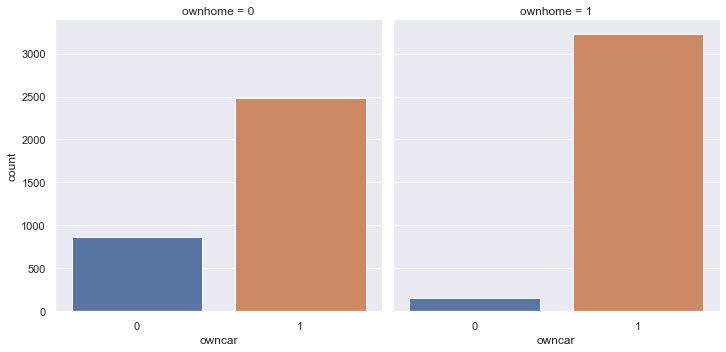

In [23]:
sns.catplot(x='owncar', col ='ownhome', kind='count', data = X_train)


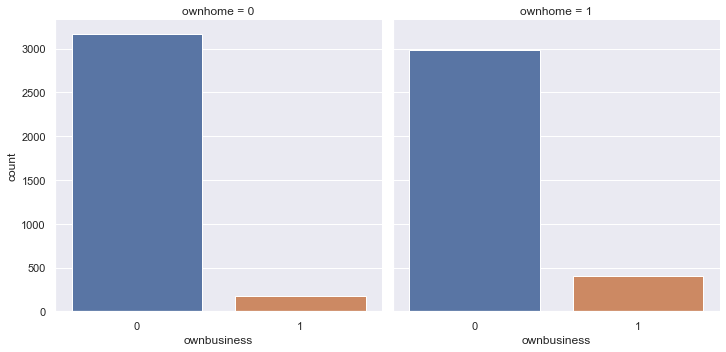

In [24]:
sns.catplot(x='ownbusiness', col ='ownhome', kind='count', data = X_train)


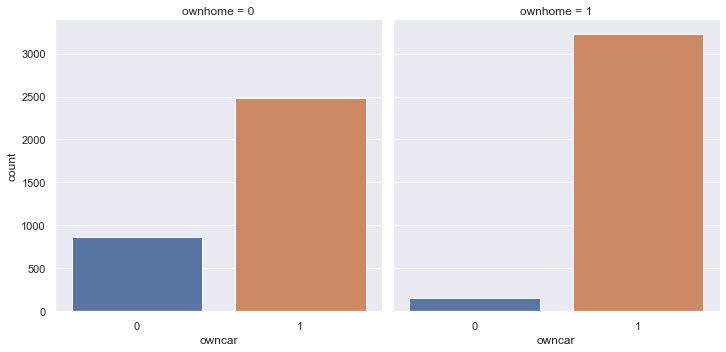

In [25]:
sns.catplot(x='owncar', col ='ownhome', kind='count', data = X_train)


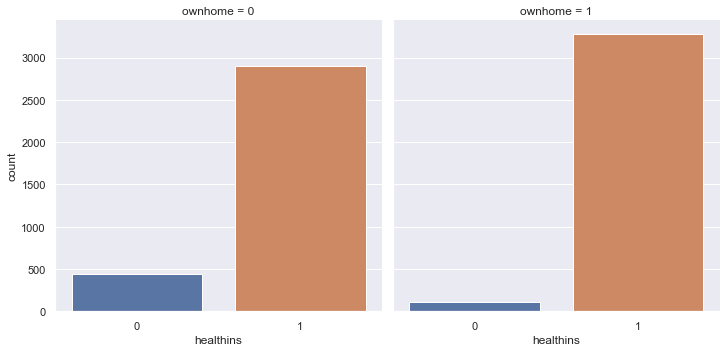

In [26]:
sns.catplot(x='healthins', col ='ownhome', kind='count', data = X_train)


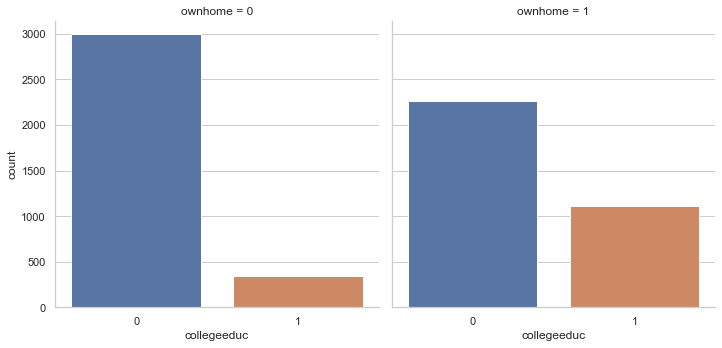

In [32]:
sns.catplot(x='collegeeduc', col ='ownhome', kind='count', data = X_train)



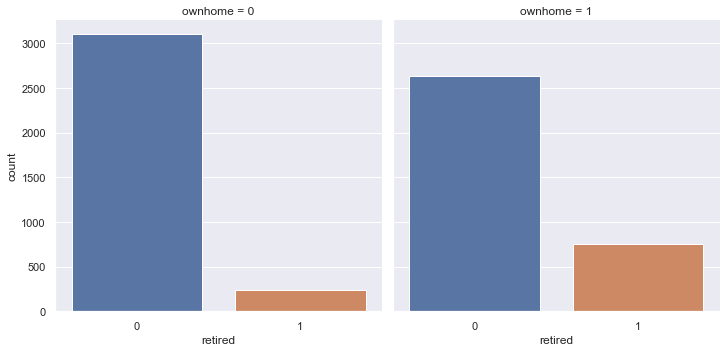

In [28]:
sns.catplot(x='retired', col ='ownhome', kind='count', data = X_train)


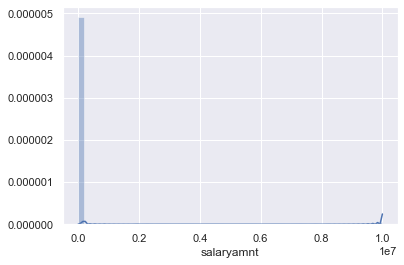

In [29]:
sns.distplot(X_train.salaryamnt)

In [30]:
X_train.drop(['familyid', 'age', 'dwellingunit', 'employmnt', 'RELEASENUMBER', 'salaryamnt', 'age2', 'worknow', 'numbercars'], axis=1)
X_test.drop(['familyid', 'age', 'dwellingunit', 'employmnt', 'RELEASENUMBER', 'salaryamnt', 'age2', 'worknow', 'numbercars'], axis=1)

,hhsize,lifesatis,ownhome,owncar,ownbusiness,healthins,collegeeduc,highlifesatis,logage,retired
7051,1,3,0,1,0,1,0,0,4.234107,1
3405,2,2,1,1,0,1,0,1,4.330733,1
4453,4,2,0,1,0,1,0,1,3.784190,0
3923,1,2,0,1,0,1,0,1,4.219508,1
3994,2,1,1,1,0,1,1,1,4.174387,0
...,...,...,...,...,...,...,...,...,...,...
3226,1,2,0,1,1,1,0,1,3.135494,0
9603,2,4,1,1,0,1,0,0,4.007333,0
8813,2,3,1,1,1,1,0,0,4.143135,0
4276,2,3,1,1,0,1,0,0,4.290460,1


Creating Logistic Regression Model

In [33]:
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
y_pred = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on train set: {:.4f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.5912


In [43]:
y_pred1 = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.5865


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_train, y_pred)
print(confusion_matrix)

[[1656 1684]
 [1065 2319]]


In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred1)
print(confusion_matrix)

[[726 719]
 [473 965]]


ROC Curve

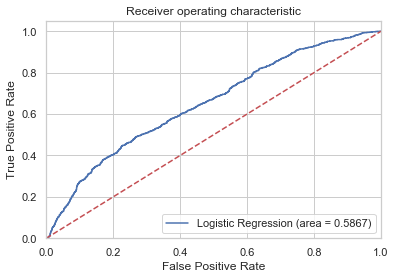

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()